In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mytools

In [2]:
df = pd.read_csv('solvent.csv')

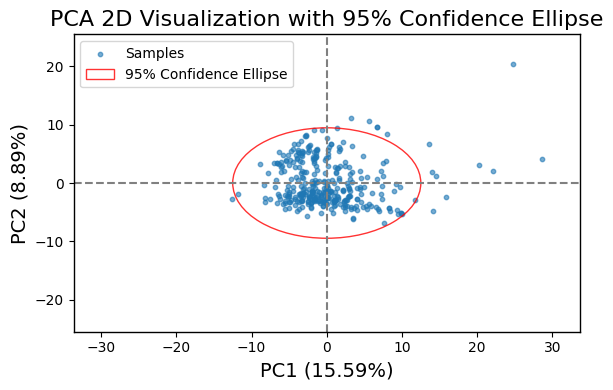

In [3]:
fig, ax = mytools.v_pca(df.iloc[:, 1:])

# Add a black bold border to the canvas
for spine in ax.spines.values():
    spine.set_linewidth(1)
    spine.set_color('black')
fig.savefig('1.png', dpi=300, bbox_inches='tight')

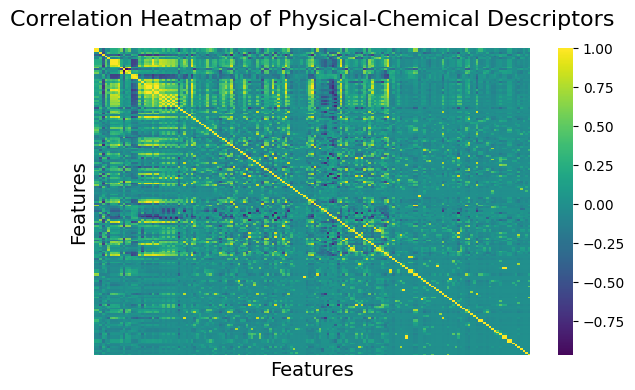

In [4]:
fig, ax = mytools.v_hmap(df.iloc[:, 1:])
fig.savefig('2.png', dpi=300, bbox_inches='tight')

# Data Standardization

In [5]:
from sklearn.preprocessing import StandardScaler

# Data Standardization
X = df.iloc[:, 1:].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the Number of Clusters

In [6]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN

In [7]:
def line_segment_distance(x, y, x_start, y_start, x_end, y_end):
    """
    Calculate the perpendicular distance from point (x, y) to the line segment defined by points (x_start, y_start) 
    and (x_end, y_end).
    """
    # 线段向量
    seg_vec_x = x_end - x_start
    seg_vec_y = y_end - y_start
    
    # 点到线段起点的向量
    point_to_start_vec_x = x - x_start
    point_to_start_vec_y = y - y_start
    
    # 投影长度
    proj_length = (point_to_start_vec_x * seg_vec_x + point_to_start_vec_y * seg_vec_y) / (seg_vec_x**2 + seg_vec_y**2)
    
    # 投影点坐标
    proj_point_x = x_start + proj_length * seg_vec_x
    proj_point_y = y_start + proj_length * seg_vec_y
    
    # 检查投影点是否在线段上
    if proj_length < 0:
        proj_point_x, proj_point_y = x_start, y_start
    elif proj_length > 1:
        proj_point_x, proj_point_y = x_end, y_end
    
    # 计算垂直距离
    distance = np.sqrt((proj_point_x - x)**2 + (proj_point_y - y)**2)
    return distance

In [8]:
# Set the number of clustering iterations
range_n_clusters = range(2, 50)

### Elbow Method

Best number of clusters based on Calinski-Harabasz Index: 14


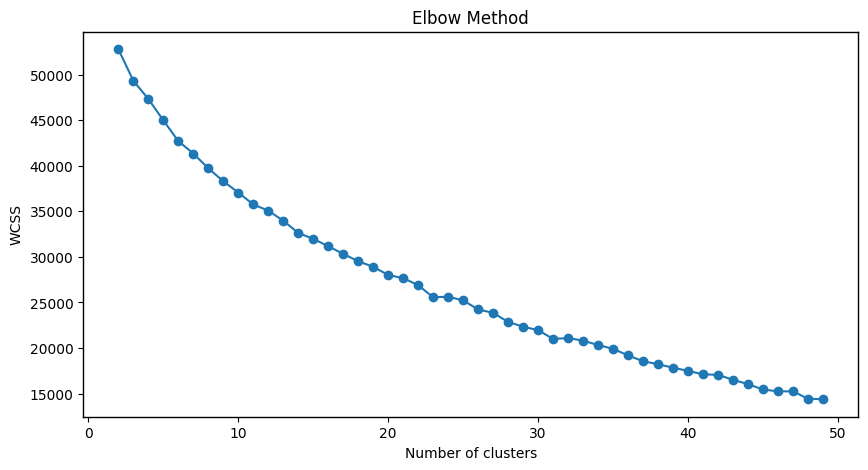

In [9]:
wcss = []  # Store the total within-cluster sum of squares for each k value
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)####
    wcss.append(kmeans.inertia_)

x = np.array(list(range_n_clusters))
y = np.array(wcss)

x_start, y_start = x[0], y[0]
x_end, y_end = x[-1], y[-1]

distances = [line_segment_distance(xi, yi, x_start, y_start, x_end, y_end) for xi, yi in zip(x, y)]
    
best_n_clusters = range_n_clusters[np.argmax(distances)]
print(f"Best number of clusters based on Calinski-Harabasz Index: {best_n_clusters}")

fig, ax = plt.subplots(figsize=(10, 5))

for spine in ax.spines.values():
    spine.set_linewidth(1)
    spine.set_color('black')

plt.plot(range_n_clusters, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
fig.savefig('3.png', dpi=300, bbox_inches='tight')
plt.show()

### Silhouette Method

Best number of clusters based on Calinski-Harabasz Index: 46


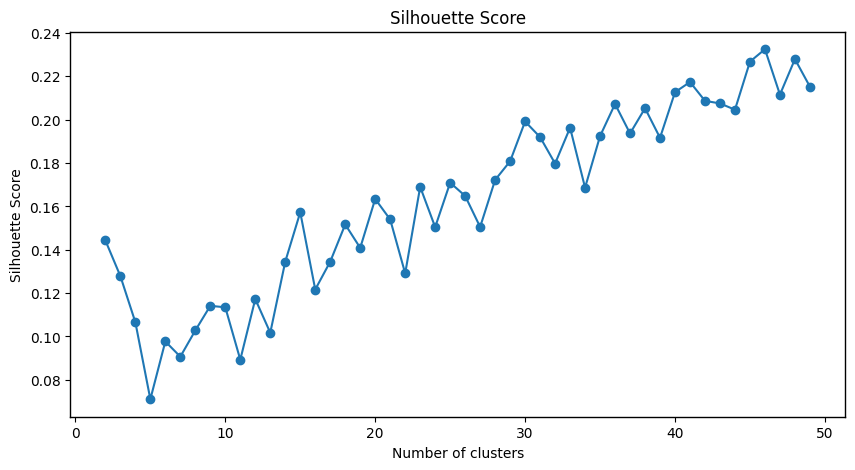

In [10]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)####
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)####
    silhouette_scores.append(silhouette_avg)
    
best_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"Best number of clusters based on Calinski-Harabasz Index: {best_n_clusters}")

fig, ax = plt.subplots(figsize=(10, 5))

for spine in ax.spines.values():
    spine.set_linewidth(1)
    spine.set_color('black')
    
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

fig.savefig('4.png', dpi=300, bbox_inches='tight')
plt.show()

###  Calinski-Harabasz Index Method

Best number of clusters based on Calinski-Harabasz Index: 3


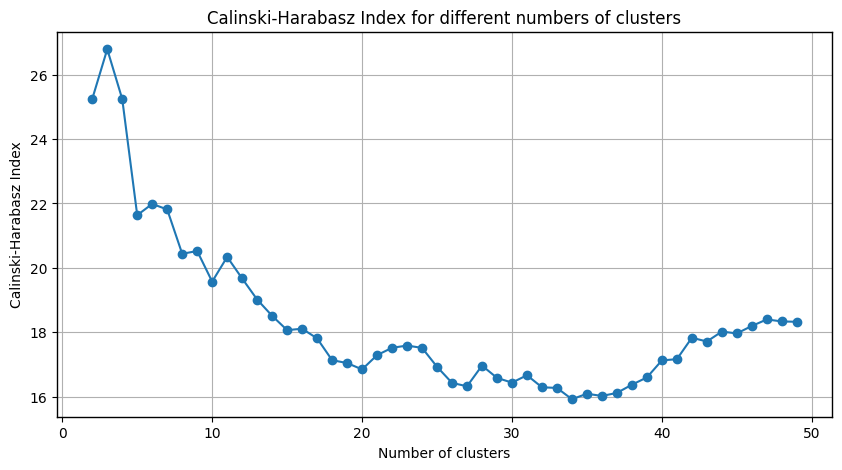

In [11]:
from sklearn.metrics import calinski_harabasz_score

calinski_harabasz_scores = []

for n_clusters in range_n_clusters:
    kmeans_clustering = KMeans(n_clusters=n_clusters, random_state=0).fit(X_scaled)####
    clusters_agg = kmeans_clustering.fit_predict(X_scaled)####
    
    score = calinski_harabasz_score(X_scaled, clusters_agg)####
    calinski_harabasz_scores.append(score)

best_n_clusters = range_n_clusters[np.argmax(calinski_harabasz_scores)]
print(f"Best number of clusters based on Calinski-Harabasz Index: {best_n_clusters}")

fig, ax = plt.subplots(figsize=(10, 5))

for spine in ax.spines.values():
    spine.set_linewidth(1)
    spine.set_color('black')
    
plt.plot(range_n_clusters, calinski_harabasz_scores, marker='o')
plt.title('Calinski-Harabasz Index for different numbers of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.grid(True)

fig.savefig('5.png', dpi=300, bbox_inches='tight')
plt.show()

### Comprehensive Calculation of the Final Number of Clusters

In [12]:
def normalize(arr):
    return (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

In [13]:
normalized_wcss_distances = normalize(distances)
normalized_silhouette_scores = normalize(silhouette_scores)
normalized_calinski_harabasz_scores = normalize(calinski_harabasz_scores)

combined_scores = normalized_wcss_distances + normalized_silhouette_scores + normalized_calinski_harabasz_scores
normalized_combined_scores = normalize(combined_scores)

optimal_clusters = range_n_clusters[np.argmax(combined_scores)]

print(f'The optimal clusters number:{optimal_clusters}')

The optimal clusters number:23


In [14]:
df1 = pd.DataFrame(columns = ['n_clusters', 'normalized_combined_scores'])
df1['n_clusters'] = range_n_clusters
df1['normalized_combined_scores'] = normalized_combined_scores.round(2)

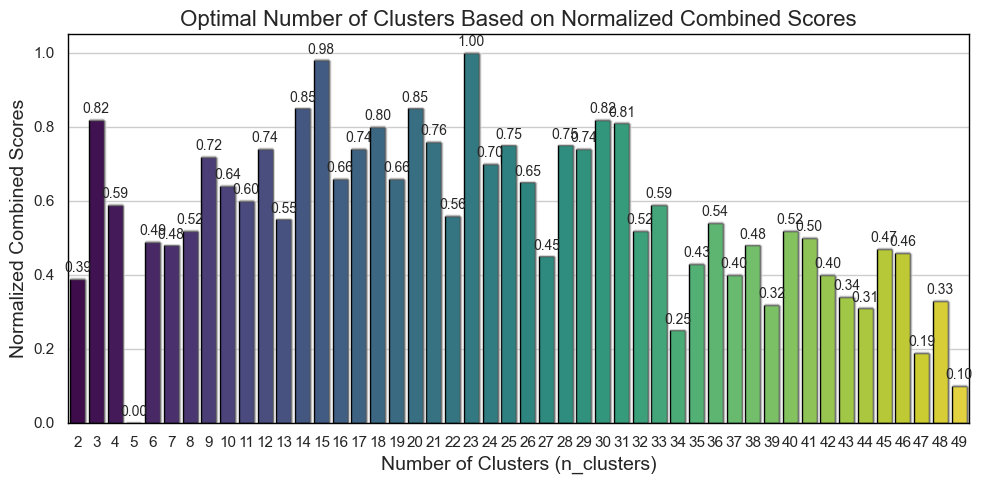

In [15]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 5))

for spine in ax.spines.values():
    spine.set_linewidth(1)
    spine.set_color('black')

ax = sns.barplot(x='n_clusters', y='normalized_combined_scores', hue='n_clusters', data=df1, palette='viridis', edgecolor='black', legend=False)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.add_patch(plt.Rectangle((left+width, bottom), 0.1, height, fill=True, facecolor='gray', alpha=0.4))
    ax.add_patch(plt.Rectangle((left, bottom+height), width, 0.005, fill=True, facecolor='gray', alpha=0.4))

plt.title('Optimal Number of Clusters Based on Normalized Combined Scores', fontsize=16)
plt.xlabel('Number of Clusters (n_clusters)', fontsize=14)
plt.ylabel('Normalized Combined Scores', fontsize=14)
    
for p in ax.patches[:len(df1)]:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.01,
            f'{height:.2f}',
            ha='center', va='bottom', size=10)

plt.tight_layout()

fig.savefig('6.png', dpi=300, bbox_inches='tight')
plt.show()

# K-means Clustering and t-SNE Dimensionality Reduction Visualization

### K-means Clustering

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=23, random_state=0).fit(X_scaled)

labels = kmeans.labels_

### t-SNE Visualization

In [17]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)
tsne_df = pd.DataFrame(X_tsne, columns=['tsne_1', 'tsne_2'])
tsne_df['cluster'] = labels
tsne_df['label'] = ['Unknown']*df.shape[0]
tsne_df['solvent_smiles'] = df['solvent_smiles']
tsne_df.loc[12, 'label'] = 'Good'
tsne_df.loc[119, 'label'] = 'Good'
tsne_df.loc[1, 'label'] = 'Good'
tsne_df.loc[86, 'label'] = 'Bad'
tsne_df.loc[60, 'label'] = 'Bad'

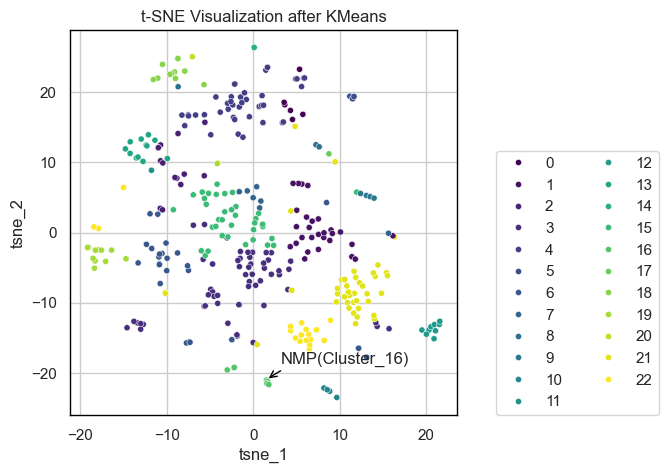

In [18]:
# sns.scatterplot(x='tsne_1', y='tsne_2', data=tsne_df[tsne_df['label'] == 'Unknown'], color='gray', label='Unknown')

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(5, 5))

for spine in ax.spines.values():
    spine.set_linewidth(1)
    spine.set_color('black')

sns.scatterplot(x='tsne_1', y='tsne_2', data=tsne_df, hue='cluster', palette='viridis', s=20, legend='full')

# 绘制已知的好数据点（绿色）
# good_points = tsne_df[tsne_df['label'] == 'Good']
# sns.scatterplot(x='tsne_1', y='tsne_2', data=good_points, color='red', marker='x', s=50, label='Good Solvents')

# 绘制已知的坏数据点（红色）
# bad_points = tsne_df[tsne_df['label'] == 'Bad']
# sns.scatterplot(x='tsne_1', y='tsne_2', data=bad_points, color='black', marker='x', s=50, label='Bad Solvents')

# 添加特定数据点的信息标签
# labels = ['NMP', 'DMI', 'TMU', 'NMF', 'DMSO', 'DMF']
# indices = [12, 119, 1, 86, 60, 79]
# for i, label in zip(indices, labels):
#     plt.text(tsne_df.iloc[i, 0]+0.3, tsne_df.iloc[i, 1]+0.3, label, color='k')

plt.annotate(
    'NMP(Cluster_16)', 
    (tsne_df.iloc[12, 0], tsne_df.iloc[12, 1]),
    textcoords="offset points",
    xytext=(10, 10),
    ha='left',
    va='bottom',
    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2', color='black')
)

plt.title('t-SNE Visualization after KMeans')
plt.legend(loc=(1.1,0), ncol=2)
plt.savefig('7.png', dpi=300, bbox_inches='tight')
plt.show()

# Further Analysis Combining Experiments

### GOOD：N-Methylpyrrolidone(NMP-12), 1,3-Dimethyl-2-imidazolidinone(DMI-119), Tetramethylurea(TMU-1)
### BAD：N-Methylformamide(NMF-86), Dimethyl sulfoxide(DMSO-60)

In [19]:
from pubchempy import get_compounds
from rdkit import Chem

In [20]:
tsne_df[tsne_df['cluster']== 16]

,tsne_1,tsne_2,cluster,label,solvent_smiles
1,-2.139782,-19.222141,16,Good,CN(C)C(=O)N(C)C
12,1.534041,-21.045443,16,Good,CN1CCCC1=O
118,-2.202968,-19.262699,16,Unknown,CN1CCCN(C)C1=O
119,-3.000138,-19.599472,16,Good,CN1CCN(C)C1=O
120,1.658954,-21.229017,16,Unknown,CCN1CCCC1=O
149,1.595763,-21.540155,16,Unknown,CN1CCCCCC1=O
314,1.811192,-21.685707,16,Unknown,C=CN1CCCCCC1=O


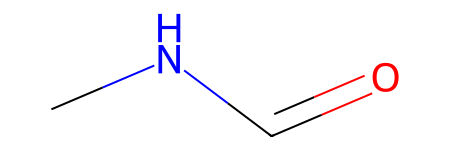

In [21]:
TMU_1 = 'CN(C)C(=O)N(C)C'
NMP_12 = 'CN1CCCC1=O'
DMPU_118 = 'CN1CCCN(C)C1=O'
DMI_119 = 'CN1CCN(C)C1=O'
NEP_120 = 'CCN1CCCC1=O'
N_Methylcaprolactam_149 = 'CN1CCCCCC1=O'
N_Vinylcaprolactam_314 = 'C=CN1CCCCCC1=O'
DMSO_60 = 'CS(C)=O'
NMF_86 = 'CNC=O'
Chem.MolFromSmiles(NMF_86)

# Integrate Compound Experimental Feature Data

In [22]:
df1 = pd.read_csv('solvent_extra.csv')
df2 = pd.concat([df, df1.iloc[:,1:]], axis=1)

### Set Data Labels Based on Experimental Results

In [23]:
df2['label'] = [-1]*348
df2.loc[12, 'label'] = 1
df2.loc[118, 'label'] = 1
df2.loc[119, 'label'] = 1
df2.loc[120, 'label'] = 0
df2.loc[60, 'label'] = 0
df2.loc[86, 'label'] = 0

### Preliminary Model Evaluation

In [24]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import KFold
import warnings

warnings.filterwarnings("ignore")


X = df2.iloc[:, 1:-1].values  
y = df2['label'].values       


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_labeled = X_scaled[y != -1]
y_labeled = y[y != -1]


kf = KFold(n_splits=5, shuffle=True, random_state=42)


all_models = []
all_predictions = []

for train_index, test_index in kf.split(X_labeled):
    X_train, X_test = X_labeled[train_index], X_labeled[test_index]
    y_train, y_test = y_labeled[train_index], y_labeled[test_index]

    clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
    models, predictions = clf.fit(X_train, X_test, y_train, y_test)
    
    all_models.append(models)
    all_predictions.append(predictions)

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 50.78it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 2, number of negative: 2
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 63.56it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 3, number of negative: 2
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.600000 -> initscore=0.405465
[LightGBM] [Info] Start training from score 0.405465
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there 

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 61.79it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 3, number of negative: 2
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.600000 -> initscore=0.405465
[LightGBM] [Info] Start training from score 0.405465
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there 

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 62.44it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 2, number of negative: 3
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.400000 -> initscore=-0.405465
[LightGBM] [Info] Start training from score -0.405465
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because ther

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 66.41it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 2, number of negative: 3
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.400000 -> initscore=-0.405465
[LightGBM] [Info] Start training from score -0.405465
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because ther

### Instantiate High-Performance Model

In [25]:
models_name = set()

for model in all_models:
    perfect_models = model[model['Accuracy'] == 1].index
    for model_name in perfect_models:
        models_name.add(model_name)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.utils import all_estimators
from sklearn.base import ClassifierMixin
from tqdm import tqdm
import inspect

In [27]:
def train_and_evaluate_model(model_name, X_train, y_train, X_test, y_test, random_state=42, ignore_warnings=True):
    """
        Train a model based on the given model name and output evaluation metrics.

        Parameters:
        - model_name: The name of the model (e.g., 'LogisticRegression')
        - X_train, y_train: Training data and labels
        - X_test, y_test: Testing data and labels
        - random_state: Random state seed for reproducibility
        - ignore_warnings: Whether to ignore warning messages

        Returns:
        - trained_model: The trained model
        - metrics: A dictionary containing accuracy, classification report, and confusion matrix
"""
    
    removed_classifiers = [
        "ClassifierChain",
        "ComplementNB",
        "GradientBoostingClassifier",
        "GaussianProcessClassifier",
        "HistGradientBoostingClassifier",
        "MLPClassifier",
        "LogisticRegressionCV", 
        "MultiOutputClassifier", 
        "MultinomialNB", 
        "OneVsOneClassifier",
        "OneVsRestClassifier",
        "OutputCodeClassifier",
        "RadiusNeighborsClassifier",
        "VotingClassifier",
    ]
    

    classifiers = [
        est for est in all_estimators()
        if (issubclass(est[1], ClassifierMixin) and (est[0] not in removed_classifiers))
    ]
    
    
    classifier_dict = {clf[0]: clf[1] for clf in classifiers}
    
    if model_name not in classifier_dict:
        raise ValueError(f"Model '{model_name}' is not available.")
    
    if isinstance(X_train, np.ndarray):
        X_train = pd.DataFrame(X_train)
        X_test = pd.DataFrame(X_test)

    numeric_features = X_train.select_dtypes(include=[np.number]).columns
    categorical_features = X_train.select_dtypes(include=["object"]).columns

    
    numeric_transformer = Pipeline(
        steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())]
    )

    categorical_transformer_low = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
            ("encoding", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
        ]
    )

    categorical_transformer_high = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
            ("encoding", OrdinalEncoder()),
        ]
    )

    def get_card_split(df, cols, n=11):
        cond = df[cols].nunique() > n
        card_high = cols[cond]
        card_low = cols[~cond]
        return card_low, card_high

    categorical_low, categorical_high = get_card_split(X_train, categorical_features)

    preprocessor = ColumnTransformer(
        transformers=[
            ("numeric", numeric_transformer, numeric_features),
            ("categorical_low", categorical_transformer_low, categorical_low),
            ("categorical_high", categorical_transformer_high, categorical_high),
        ]
    )

    
    ModelClass = classifier_dict[model_name]
    model_params = {}
    
    
    if 'random_state' in inspect.signature(ModelClass).parameters:
        model_params['random_state'] = random_state
    
    model = ModelClass(**model_params)
    
    pipe = Pipeline(
        steps=[("preprocessor", preprocessor), ("classifier", model)]
    )
    
    pipe.fit(X_train, y_train)
    
    
    y_pred = pipe.predict(X_test)
    
    
    accuracy = accuracy_score(y_test, y_pred)
    b_accuracy = balanced_accuracy_score(y_test, y_pred)
    
    
    metrics = {
        "Accuracy": accuracy,
        "Balanced Accuracy": b_accuracy
    }
    
    return pipe, metrics

In [28]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

all_models = {}
all_metrics = {}

for fold, (train_index, test_index) in enumerate(kf.split(X_labeled), 1):
    print(f"\nCurrent, {fold} fold cross validation...")
    X_train, X_test = X_labeled[train_index], X_labeled[test_index]
    y_train, y_test = y_labeled[train_index], y_labeled[test_index]
    
    for model_name in tqdm(models_name, desc='Model training：'):
            trained_model, metrics = train_and_evaluate_model(model_name, X_train, y_train, X_test, y_test)
            
            if metrics['Accuracy'] == 1:
                model_name_with_fold = f"{model_name}_fold_{fold}"
                all_models[model_name_with_fold] = trained_model
                all_metrics[model_name_with_fold] = metrics


Current, 1 fold cross validation...


Model training：: 100%|████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 19.47it/s]



Current, 2 fold cross validation...


Model training：: 100%|████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 18.69it/s]



Current, 3 fold cross validation...


Model training：: 100%|████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 18.73it/s]



Current, 4 fold cross validation...


Model training：: 100%|████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 19.33it/s]



Current, 5 fold cross validation...


Model training：: 100%|████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 19.53it/s]


In [31]:
for i in range(tsne_df.shape[0]):
    count = 0
    for model in all_models.values():
        predict_label = model.predict(X_scaled[i].reshape(1, -1))
        if predict_label[0] == 1:
            count += 1
    pro = round(count/len(all_models), 4)
    if pro > 0.72:
        print(f"The Probability of Solvent_{i} is：{pro}")

The Probability of Solvent_1 is：0.7234
The Probability of Solvent_12 is：0.9574
The Probability of Solvent_118 is：1.0
The Probability of Solvent_119 is：1.0
The Probability of Solvent_231 is：0.8085
The Probability of Solvent_342 is：0.8298


CN(C)C(=O)N(C)C


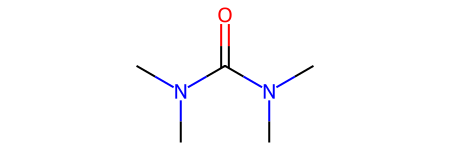

In [32]:
print(df.loc[1,'solvent_smiles'])
Chem.MolFromSmiles(df.loc[1,'solvent_smiles'])

# Top20 Predicted Solvents

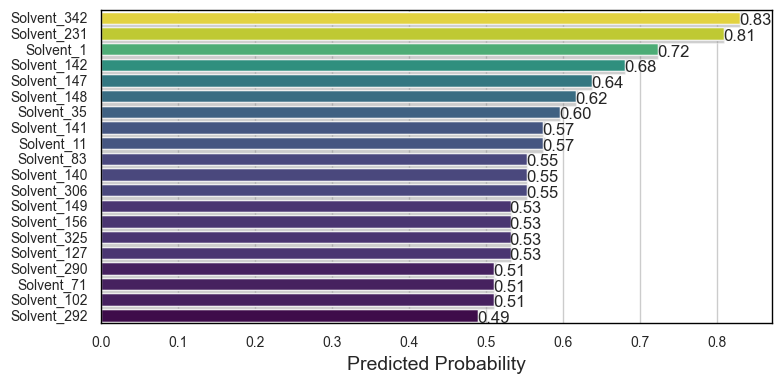

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Top20.csv')

fig, ax = plt.subplots(figsize=(8, 4))

sns_bar = sns.barplot(x='pre_pro', y='Solvent_ID', palette="viridis", hue='pre_pro', data=data, legend=False)

plt.xlabel('Predicted Probability', fontsize=14)
plt.ylabel('', fontsize=14)

for p in sns_bar.patches:
    width = p.get_width() 
    sns_bar.text(width-0.001, p.get_y() + p.get_height()/2+0.2,
                 f'{width:.2f}',
                 ha='left', va='center')


for p in sns_bar.patches:
    left, bottom, width, height = p.get_bbox().bounds
    sns_bar.add_patch(plt.Rectangle((left+width, bottom), 0.002, height, fill=True, facecolor='gray', alpha=0.4))
    sns_bar.add_patch(plt.Rectangle((left, bottom+height), width, 0.2, fill=True, facecolor='gray', alpha=0.4))
    
for spine in ax.spines.values():
    spine.set_linewidth(1) 
    spine.set_color('black')  
    
sns_bar.tick_params(axis='both', which='major', labelsize=10)
    
plt.tight_layout()

plt.savefig('Top20.png', dpi=300)

plt.show()

# SHAP Analyzing

In [34]:
import shap
from collections import Counter

In [36]:
most_important_des_name = []
model_ids = []

for i,model in tqdm(enumerate(all_models.values()), desc='Descriptors Important：'):

    explainer = shap.Explainer(model.predict, X_scaled)
    shap_values = explainer(X_labeled)
    
  
    feature_importance = abs(shap_values.values).mean(axis=0)
    
   
    idx = np.argmax(feature_importance)
    
    
    des_name = df2.columns[1:][idx]

    
    most_important_des_name.append(des_name)
    
   
    model_ids.append(i)


counter = Counter(most_important_des_name)


most_important_des_name_df = pd.DataFrame({
    'name': [key for key, _ in counter.items()],
    'frequency': [value for _, value in counter.items()],
    'model_id': [[] for _ in range(len(counter))] 
})


for name, model_id in zip(most_important_des_name, model_ids):
    index = most_important_des_name_df.index[most_important_des_name_df['name'] == name].tolist()[0]
    most_important_des_name_df.at[index, 'model_id'].append(model_id)


most_important_des_name_df['model_id'] = most_important_des_name_df['model_id'].apply(lambda x: ', '.join(map(str, x)))


most_important_des_name_df = most_important_des_name_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)

Descriptors Important：: 47it [00:41,  1.13it/s]


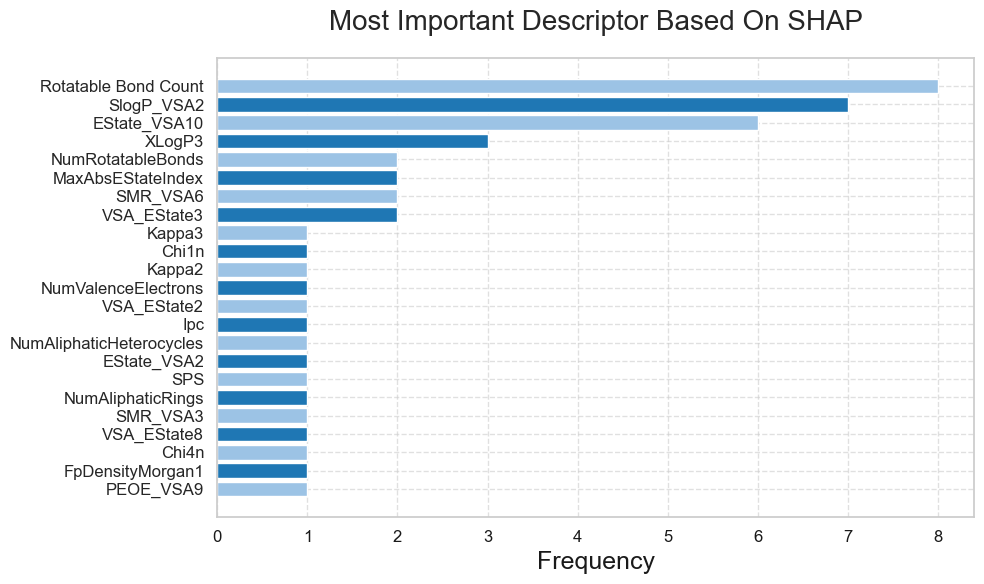

In [37]:
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['font.serif'] = ['Arial']  # Arial


fig, ax1 = plt.subplots(figsize=(10, 6))


color_even = (156/255, 195/255, 229/255) 
color_odd = '#1f77b4'   


descriptors = most_important_des_name_df['name']
frequencies = most_important_des_name_df['frequency']


for index, (descriptor, frequency) in enumerate(zip(descriptors, frequencies)):
    if index % 2 == 0:
        color = color_even
    else:
        color = color_odd
    ax1.barh(
        descriptor,
        frequency,
        color=color,
        height=0.8,  
    )


ax1.set_xlabel('Frequency', fontsize=18, color='k')
ax1.tick_params(axis='x', labelcolor='k')
ax1.tick_params(axis='both', which='major', labelsize=12)


ax1.invert_yaxis()


ax1.grid(True, linestyle='--', alpha=0.6)
plt.title('Most Important Descriptor Based On SHAP', fontsize=20, pad=20)
plt.tight_layout()


# plt.savefig('publication_trend.tif', dpi=300, bbox_inches='tight')


plt.show()

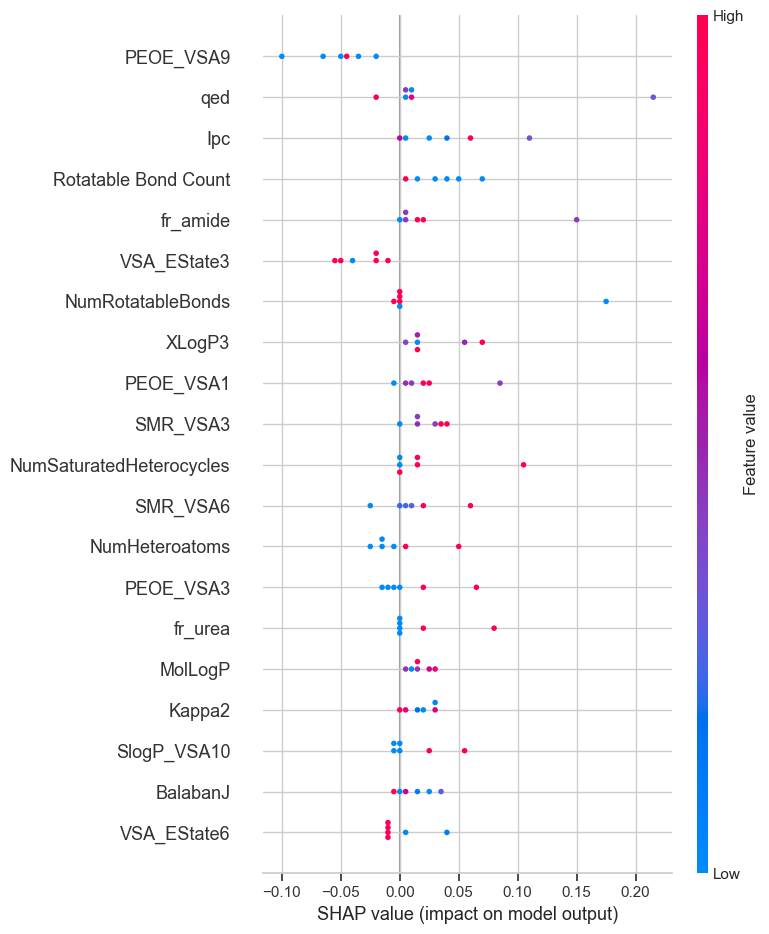

In [38]:
model = all_models[list(all_models.keys())[34]]

explainer = shap.Explainer(model.predict, X_scaled)
shap_values = explainer(X_labeled)

shap.summary_plot(shap_values, X_labeled,  feature_names=df2.columns[1:])